<a href="https://colab.research.google.com/github/AysuSulucay/BTK_Akademi_VeriMaratonu/blob/main/MachineLearning_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LINEAR REGRESSION (LR)**

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import Sklearn 
from sklearn.linear_model import LinearRegression

In [ ]:
# Import Data
df = pd.read_csv("/content/drive/MyDrive/BTK_AKADEMİ_VERİ MARATONU/Veri Setleri/dogrusal_regresyon_veriseti_20220209.csv", sep = ";")
# "sep = ;" The reason is that the data in the csv file is separated by a semicolon
df.head()

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


In [ ]:
# changing columns name
df = df.rename(columns = {"deneyim": "experience", 
                          "maas": "salary"})
df.head()

,experience,salary
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


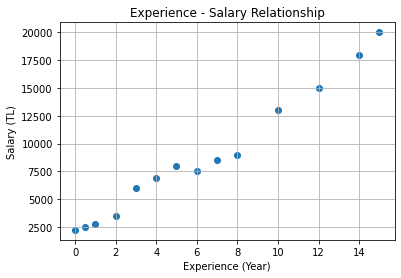

In [ ]:
# Visualize Data
plt.scatter(df.experience,df.salary)
plt.xlabel("Experience (Year)")
plt.ylabel("Salary (TL)")
plt.title("Experience - Salary Relationship")
plt.grid(True)
plt.show()

In [ ]:
# Linear Regression Model Training

# Linear Regression Model
linear_reg = LinearRegression()

# Convert the salary and experience columns in data to numpy array
x = df.experience.values.reshape(-1,1)
y = df.salary.values.reshape(-1,1)
# Sklearn wants functions in this format

# Linear Regression Training 
linear_reg.fit(x,y)
# Fit linear model

LinearRegression()



---



for better understanding of np.array([]).reshape() function

In [ ]:
np.array([[1, 2], [3, 4]]).reshape(1,-1) #Tek satır

array([[1, 2, 3, 4]])

In [ ]:
np.array([[1, 2], [3, 4]]).reshape(-1,1) #Tek sütun

array([[1],
       [2],
       [3],
       [4]])



---



In [ ]:
# Finding the point where it intercepts the y-axis
# Made for verification
# Alternative method
"""
np.array([0]).reshape(1,-1) ilk değeri bulduk;
O ilk değerin, y ekseni kesişim değişkeninin yerine 
koyuyoruz ve predict fonksiyonunu kullanıyoruz.

Kısaca 0 yıllık deneyim için maaş ne kadardır sorusunu cevaplamaya çalıştık.
Formülde de yerine koyunca sağlamamızın doğru olduğunu görmüş olduk.
"""
y_axis_intercept = np.array([0]).reshape(1,-1)
b0 = linear_reg.predict(y_axis_intercept)
print("b0: ", b0)

# intercept
b0_ = linear_reg.intercept_
print("b0: ",b0_)

# Finding the slope
b1 = linear_reg.coef_
print("b1: ", b1)

b0:  [[1663.89519747]]
b0:  [1663.89519747]
b1:  [[1138.34819698]]


In [ ]:
# salary = 1663 + 1138*experience  --> This is our formula
# The linear model is created according to the slope and the point where it intercepts the y-axis

experience = 11 # 11 years of experience

# Estimate the salary of someone with 11 years of experience
salary_new = 1663 + 1138*experience
print(salary_new)

# The salary of someone with 11 years of experience is estimated by the predict method
result = linear_reg.predict(np.array([experience]).reshape(1,-1))
print("Salary of someone with 11 years of experience: {} TL".format(result[0]))

14181
Salary of someone with 11 years of experience: [14185.72536421] TL


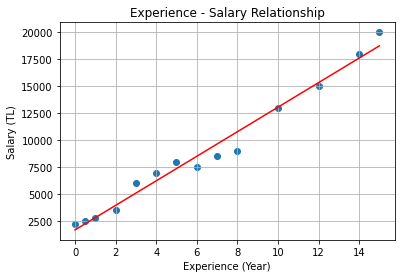

In [ ]:
# Test/Prediction/Visualization with Linear Regression Model

# array = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(-1,1)
array = np.arange(0,16, dtype = int).reshape(-1,1) 

plt.figure()
plt.scatter(x,y)

# The salary of people with experience from 0-15 years is estimated
y_head = linear_reg.predict(array) # y_head = salary

plt.plot(array, y_head, color ="red") # (experience,salary)
plt.xlabel("Experience (Year)")
plt.ylabel("Salary (TL)")
plt.title("Experience - Salary Relationship")
plt.grid(True)
plt.show()

# **MULTI LINEAR REGRESSION (MLR)**
more than two independent variables

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/BTK_AKADEMİ_VERİ MARATONU/Veri Setleri/coklu_dogrusal_regresyon_veriseti_20220209.csv", sep = ";")
df.head()

,deneyim,maas,yas
0,0.5,2500,22
1,0.0,2250,21
2,1.0,2750,23
3,5.0,8000,25
4,8.0,9000,28


In [ ]:
# changing columns name
df = df.rename(columns = {"deneyim": "experience", 
                          "maas": "salary",
                          "yas": "age"})
df.head()

,experience,salary,age
0,0.5,2500,22
1,0.0,2250,21
2,1.0,2750,23
3,5.0,8000,25
4,8.0,9000,28


In [ ]:
"""
iloc = index tabanlı lokasyon belirler
[:,[0,2]]
bütün satırları al ama satırları alırken sıfırıncı ve ikinci sütunu al

iloc() function accepts only integer type values 
as the index values for the values to be accessed and displayed.
"""
x = df.iloc[:,[0,2]].values # Independent variables -- > experience and age
# we get only the zeroth and second column while retrieving all rows
x

array([[ 0.5, 22. ],
       [ 0. , 21. ],
       [ 1. , 23. ],
       [ 5. , 25. ],
       [ 8. , 28. ],
       [ 4. , 23. ],
       [15. , 35. ],
       [ 7. , 29. ],
       [ 3. , 22. ],
       [ 2. , 23. ],
       [12. , 32. ],
       [10. , 30. ],
       [14. , 34. ],
       [ 6. , 27. ]])

In [ ]:
y = df.salary.values.reshape(-1,1) # the dependent variable
y

array([[ 2500],
       [ 2250],
       [ 2750],
       [ 8000],
       [ 9000],
       [ 6900],
       [20000],
       [ 8500],
       [ 6000],
       [ 3500],
       [15000],
       [13000],
       [18000],
       [ 7500]])

In [ ]:
# Multi Linear Regression Model Training

# Multi Linear Regression Model
MLR = LinearRegression() 

# Linear Regression Training
MLR.fit(x,y)

LinearRegression()

In [ ]:
# Test_1
test_data_1 = np.array([[10,35]]) # experience = 10 and age = 35
test_result_1 = MLR.predict(test_data_1)
print("Salary after 10 years of experience and 35 years old: {} TL".format(test_result_1[0]))

Salary after 10 years of experience and 35 years old: [11046.35815877] TL


In [ ]:
# Test_2
test_data_2 = np.array([[5,35]])
test_result_2 = MLR.predict(test_data_2)
print("Salary after 5 years of experience and 35 years old: {} TL".format(test_result_2[0]))

Salary after 5 years of experience and 35 years old: [3418.85455609] TL


https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/

In [ ]:
# sonuç görselleştirme
array = np.array([:])

plt.figure()
plt.scatter(x,y)

y_head = MLR.predict(array)

plt.plot(array, y_head, color ="red") # (experience,salary)
plt.xlabel("Experience (Year)")
plt.ylabel("Salary (TL)")
plt.title("Experience - Salary Relationship")
plt.grid(True)
plt.show()

# **POLYNOMIAL REGRESSION (PR)**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression # Linear
from sklearn.preprocessing import PolynomialFeatures # Polynomial

In [11]:
df = pd.read_csv("/content/drive/MyDrive/BTK_AKADEMİ_VERİ MARATONU/Veri Setleri/polinomsal_regresyon_veriseti_20220209.csv", sep = ";")
df.head()

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200


In [12]:
# changing columns name
df = df.rename(columns = {"araba_fiyat": "car_price", 
                          "araba_max_hiz": "car_max_speed",})
df.head()

,car_price,car_max_speed
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200


In [13]:
y = df.car_max_speed.values.reshape(-1,1) 
x = df.car_price.values.reshape(-1,1) 

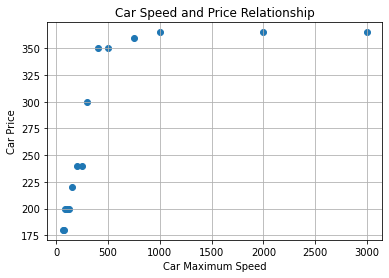

In [14]:
# Visualization of the data
plt.scatter(x,y)
plt.xlabel("Car Maximum Speed")
plt.ylabel("Car Price")
plt.title("Car Speed and Price Relationship")
plt.grid(True)
plt.show()

In [15]:
# Linear Regression Model Training

# Linear Regression Model
lr = LinearRegression()

# Linear Regression Training
lr.fit(x,y)

LinearRegression()

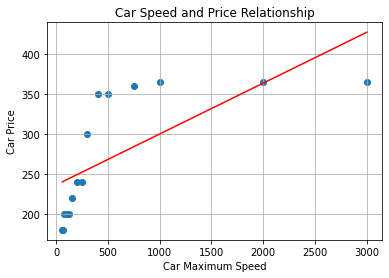

10 thousand TL car speed estimation:  [[871.66401826]]


In [20]:
# Test/Prediction/Visualization with Linear Regression Model
y_prediction = lr.predict(x)


plt.scatter(x,y)
plt.plot(x, y_prediction, color ="red") 
plt.xlabel("Car Maximum Speed")
plt.ylabel("Car Price")
plt.title("Car Speed and Price Relationship")
plt.grid(True)
plt.show()

car_price = 10000
print("10 thousand TL car speed estimation: ", lr.predict((np.array([car_price]).reshape(-1,1))))

In [31]:
# Polynomial Regression =  y = b0 + b1*x + b2*x^2 + b3*x^3 + ... + bn*x^n

# Polynomial Properties
# PR = Polynomial Regression
PR = PolynomialFeatures(degree = 4) # 4th order polynomial

x_polynomial = PR.fit_transform(x)
x_polynomial


array([[1.0000000e+00, 6.0000000e+01, 3.6000000e+03, 2.1600000e+05,
        1.2960000e+07],
       [1.0000000e+00, 7.0000000e+01, 4.9000000e+03, 3.4300000e+05,
        2.4010000e+07],
       [1.0000000e+00, 8.0000000e+01, 6.4000000e+03, 5.1200000e+05,
        4.0960000e+07],
       [1.0000000e+00, 1.0000000e+02, 1.0000000e+04, 1.0000000e+06,
        1.0000000e+08],
       [1.0000000e+00, 1.2000000e+02, 1.4400000e+04, 1.7280000e+06,
        2.0736000e+08],
       [1.0000000e+00, 1.5000000e+02, 2.2500000e+04, 3.3750000e+06,
        5.0625000e+08],
       [1.0000000e+00, 2.0000000e+02, 4.0000000e+04, 8.0000000e+06,
        1.6000000e+09],
       [1.0000000e+00, 2.5000000e+02, 6.2500000e+04, 1.5625000e+07,
        3.9062500e+09],
       [1.0000000e+00, 3.0000000e+02, 9.0000000e+04, 2.7000000e+07,
        8.1000000e+09],
       [1.0000000e+00, 4.0000000e+02, 1.6000000e+05, 6.4000000e+07,
        2.5600000e+10],
       [1.0000000e+00, 5.0000000e+02, 2.5000000e+05, 1.2500000e+08,
        6.25

In [32]:
#  In order to compare
LR2 = LinearRegression()
LR2.fit(x_polynomial, y)

LinearRegression()

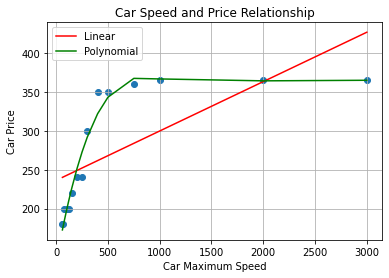

In [33]:
# Prediction 

y_prediction2 = LR2.predict(x_polynomial)

plt.scatter(x,y)
plt.plot(x, y_prediction, color ="red", label = "Linear")
plt.plot(x, y_prediction2, color = "green", label = "Polynomial")
plt.legend() 
plt.xlabel("Car Maximum Speed")
plt.ylabel("Car Price")
plt.title("Car Speed and Price Relationship")
plt.grid(True)
plt.show()

# **Evaluation of Regression Models** 

**R-squared (R^2)**


*   aka Coefficient of Determination

*   statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

 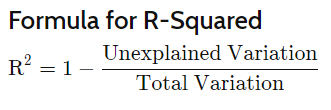

> By creating linear regression and polynomial regression models, we will evaluate these two models with the R squared method.





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score 

In [2]:
# Import Data
df = pd.read_csv("/content/drive/MyDrive/BTK_AKADEMİ_VERİ MARATONU/Veri Setleri/dogrusal_regresyon_veriseti_20220209.csv", sep = ";")
df.head()

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


In [3]:
# changing columns name
df = df.rename(columns = {"deneyim": "experience", 
                          "maas": "salary"})
df.head()

,experience,salary
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


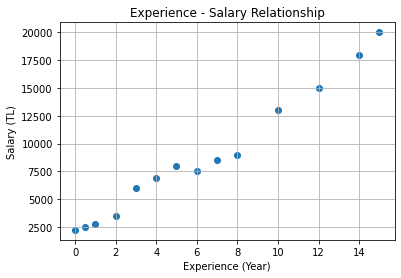

In [4]:
# Visualize Data
plt.scatter(df.experience,df.salary)
plt.xlabel("Experience (Year)")
plt.ylabel("Salary (TL)")
plt.title("Experience - Salary Relationship")
plt.grid(True)
plt.show()

In [5]:
# Convert the salary and experience columns in data to numpy array
x = df.experience.values.reshape(-1,1)
y = df.salary.values.reshape(-1,1)
# Sklearn wants functions in this format

In [6]:
# Linear Regression Model Training

# Linear Regression Model
linear_reg = LinearRegression()

# Linear Regression Training 
linear_reg.fit(x,y)
# Fit linear model

LinearRegression()

In [7]:
# Polynomial Properties
# PR = Polynomial Regression
PR = PolynomialFeatures(degree = 2) # 2nd order polynomial

x_polynomial = PR.fit_transform(x)

Poly_Reg = LinearRegression()
Poly_Reg.fit(x_polynomial, y)

LinearRegression()

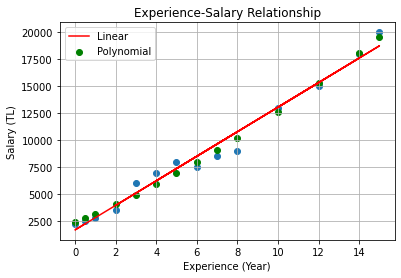

In [9]:
# Test
y_prediction_linear = linear_reg.predict(x)
y_prediction_poly = Poly_Reg.predict(x_polynomial)

plt.scatter(df.experience, df.salary)
plt.plot(x, y_prediction_linear, color ="red", label = "Linear")
plt.scatter(x, y_prediction_poly, color = "green", label = "Polynomial")
plt.legend() 
plt.xlabel("Experience (Year)")
plt.ylabel("Salary (TL)")
plt.title("Experience-Salary Relationship")
plt.grid(True)
plt.show()

In [10]:
print("Linear Regression R squared: {}", r2_score(y,y_prediction_linear))
print("Polynomial Regression R squared: {}", r2_score(y,y_prediction_poly))

Linear Regression R squared: {} 0.9775283164949903
Polynomial Regression R squared: {} 0.9854449464578782


# **CLASSIFICATION**


*   predictive modeling problem where a class label is predicted for a given example of input data.




**Logistic Regression**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#closing warnings
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Import Data
data = pd.read_csv("/content/drive/MyDrive/BTK_AKADEMİ_VERİ MARATONU/Veri Setleri/ortopedik_hastalarin_biyomekanik_ozellikleri_20220209.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


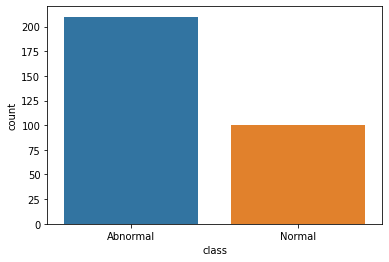

In [8]:
# Class is the categorical variable
# Visualize class
# class --> Normal and Abnormal

sns.countplot(data["class"]) 
plt.show()

In [9]:
# we want it to consist of numeric variables
# abnormal = 1 and normal = 0
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [10]:
# we have a dataset of purely numeric variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 17.1 KB


In [12]:
y = data["class"].values # putting class into the y variable
x_data = data.drop(["class"],axis=1) # data wihtout class column

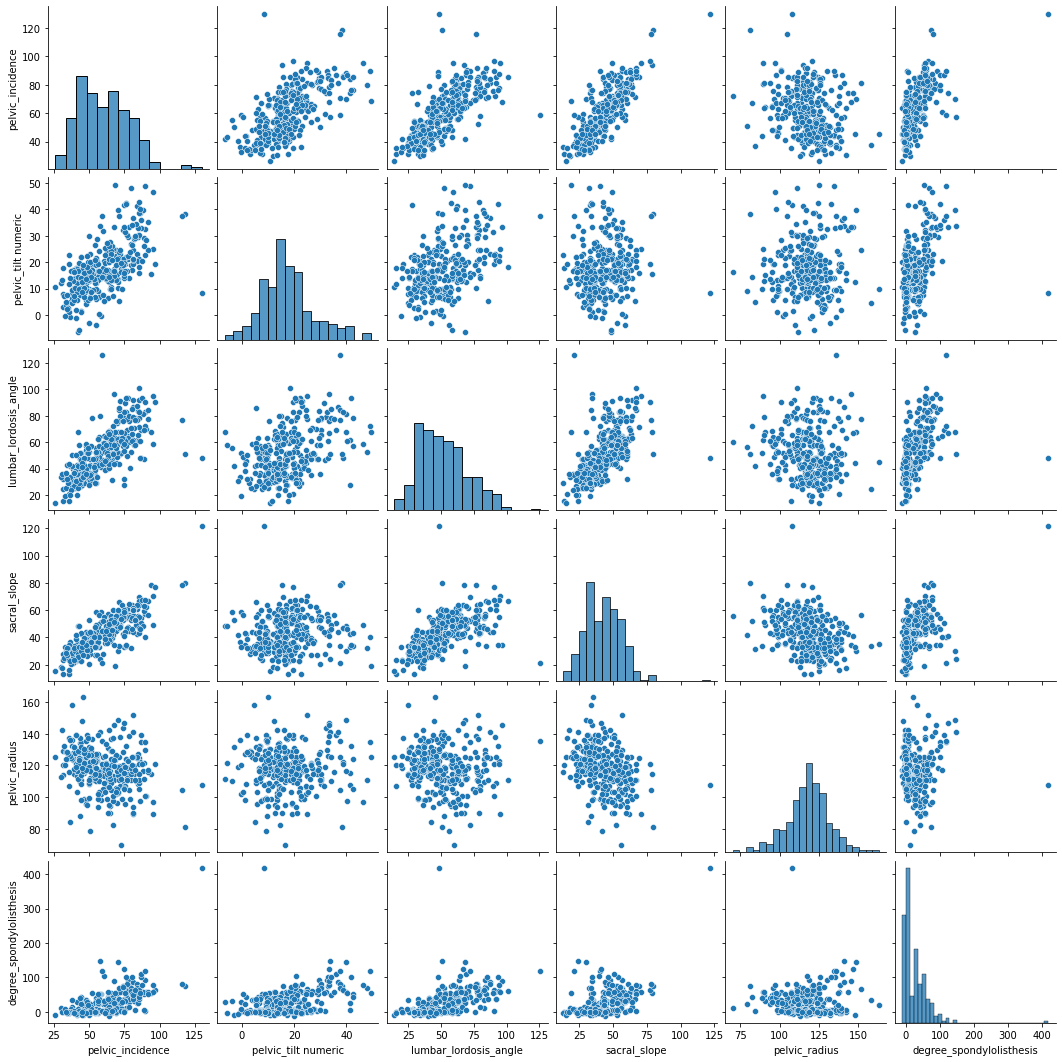

In [13]:
# interpreting the relationship between features in the data
sns.pairplot(x_data)
plt.show()

In [14]:
# min-max normalization 
x = (x_data - np.min(x_data)) / (np.max(x_data)-np.min(x_data)).values

In [16]:
# train test division
from sklearn.model_selection import train_test_split

In [17]:
# %15 test, %85 train
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15, random_state=42 )

# Transpoe
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x_train: ",x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (6, 263)
x_test:  (6, 47)
y_train:  (263,)
y_test:  (47,)


In [20]:
from sklearn.linear_model import LogisticRegression

In [22]:
# Train
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train.T, y_train.T)

LogisticRegression()

In [23]:
# Test
test_validation = logistic_reg.score(x_test.T, y_test.T)
print("Test Validation: {}".format(test_validation))

Test Validation: 0.7872340425531915


**K-nearest neighbor (kNN)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Data
data = pd.read_csv("/content/drive/MyDrive/BTK_AKADEMİ_VERİ MARATONU/Veri Setleri/ortopedik_hastalarin_biyomekanik_ozellikleri_20220209.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


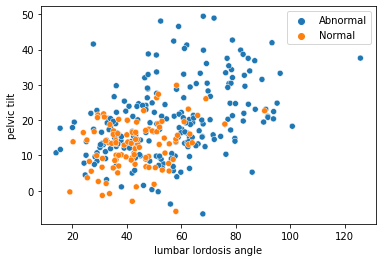

In [4]:
sns.scatterplot(data=data, x="lumbar_lordosis_angle", y ="pelvic_tilt numeric", hue="class")
plt.xlabel("lumbar lordosis angle")
plt.ylabel("pelvic tilt")
plt.legend()
plt.show()



> this is the hard problem for k-nearest neighbor algorithm because abnormal and normal classes nested in 2D 



In [5]:
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head(3)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1


In [6]:
y = data["class"].values # putting class into the y variable
x_data = data.drop(["class"],axis=1) # data wihtout class column

In [7]:
# min-max normalization 
x = (x_data - np.min(x_data)) / (np.max(x_data)-np.min(x_data)).values

In [8]:
# train test division
from sklearn.model_selection import train_test_split

# %15 test, %85 train
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15, random_state=1 )

In [17]:
# kNN model
from sklearn.neighbors import KNeighborsClassifier
neighbor_number = 25
knn = KNeighborsClassifier(n_neighbors = neighbor_number)
knn.fit(x_train, y_train)

prediction = knn.predict(x_test)
print("{} k-nearest neighbor model test validation: {} ".format(neighbor_number,knn.score(x_test,y_test)))

25 k-nearest neighbor model test validation: 0.7872340425531915 


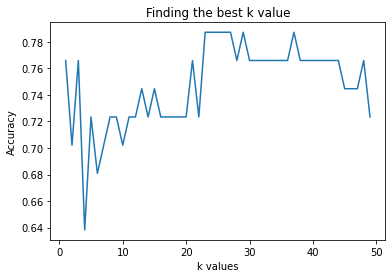

In [15]:
# Finding the best k value
score_list = []
for each in range(1,50):
  knn2 = KNeighborsClassifier(n_neighbors = each)
  knn2.fit(x_train,y_train)
  score_list.append(knn2.score(x_test,y_test))

plt.plot(range(1,50),score_list)
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.title("Finding the best k value")
plt.show()

**Support Vector Machine (SVM)**

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("/content/drive/MyDrive/BTK_AKADEMİ_VERİ MARATONU/Veri Setleri/ortopedik_hastalarin_biyomekanik_ozellikleri_20220209.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [5]:
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head(3)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1


In [6]:
y = data["class"].values # putting class into the y variable
x_data = data.drop(["class"],axis=1) # data wihtout class column

In [7]:
# min-max normalization 
x = (x_data - np.min(x_data)) / (np.max(x_data)-np.min(x_data)).values

In [8]:
# train test division
from sklearn.model_selection import train_test_split

# %15 test, %85 train
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15, random_state=1 )

In [9]:
# Import Support Vector Machine 
from sklearn.svm import SVC

# Support Vector Machine Training
svm = SVC(random_state = 1)
svm.fit(x_train,y_train)

print("Support Vector Machine Test Validation: {}".format(svm.score(x_test,y_test)))

Support Vector Machine Test Validation: 0.7872340425531915


**Decision Tree**

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("/content/drive/MyDrive/BTK_AKADEMİ_VERİ MARATONU/Veri Setleri/ortopedik_hastalarin_biyomekanik_ozellikleri_20220209.csv")
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head(3)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1


In [3]:
y = data["class"].values # putting class into the y variable
x_data = data.drop(["class"],axis=1) # data wihtout class column

In [4]:
# min-max normalization 
x = (x_data - np.min(x_data)) / (np.max(x_data)-np.min(x_data))

In [5]:
# train test division
from sklearn.model_selection import train_test_split

# %15 test, %85 train
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15, random_state=1 )

In [10]:
# Import Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Training
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("Decision Tree Test Validation: {}".format(dt.score(x_test,y_test)))

Decision Tree Test Validation: 0.8297872340425532




> Şu son bloğu tekrar tekrar çalıştırdıkça farklı sonuç veriyor. Decision Tree modeline özel bir özellik mi? Araştır.





**Random Forest**